In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.51817317, -0.19652512, -0.05568711, -0.04555083,  0.02120089,
         0.06820841,  0.0977897 ,  0.53483613, -0.7147743 ,  0.23282504],
       [ 1.54261272,  1.20284782,  1.54634858, -1.11278878, -1.03483227,
        -1.54540358,  0.08696983,  1.39874326, -0.90073041,  1.2427699 ]])

In [4]:
test_Features[:2]

array([[-5.29260478e-01, -8.41323701e-01, -4.68310225e-01,
         1.74813100e+00,  1.51702163e+00,  4.70243690e-01,
         3.48701599e-01, -4.26963668e-01, -1.00320931e+00,
        -4.66216345e-02],
       [ 2.04124668e+00,  2.95991490e-01,  1.25412678e+00,
        -1.05371051e+00, -1.08641230e+00, -3.54301168e+00,
         1.49111918e+00, -1.12062936e+00, -2.47890434e-03,
        -8.41070197e-01]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 0, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*9,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=30*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=30*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=30*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=30*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=30*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 270)               2970      
_________________________________________________________________
dense_2 (Dense)              (None, 240)               65040     
_________________________________________________________________
dense_3 (Dense)              (None, 210)               50610     
_________________________________________________________________
dense_4 (Dense)              (None, 180)               37980     
_________________________________________________________________
dense_5 (Dense)              (None, 150)               27150     
_________________________________________________________________
dense_6 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_7 (Dense)              (None, 90)                10890     
__________

In [21]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [22]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 5s - loss: 0.6887 - acc: 0.6420 - val_loss: 0.6786 - val_acc: 0.6353
Epoch 2/30
 - 1s - loss: 0.5367 - acc: 0.6504 - val_loss: 0.4811 - val_acc: 0.6984
Epoch 3/30
 - 1s - loss: 0.4071 - acc: 0.8217 - val_loss: 0.3529 - val_acc: 0.8548
Epoch 4/30
 - 1s - loss: 0.3554 - acc: 0.8537 - val_loss: 0.3328 - val_acc: 0.8693
Epoch 5/30
 - 1s - loss: 0.3339 - acc: 0.8614 - val_loss: 0.3149 - val_acc: 0.8693
Epoch 6/30
 - 1s - loss: 0.3235 - acc: 0.8662 - val_loss: 0.3284 - val_acc: 0.8679
Epoch 7/30
 - 1s - loss: 0.3154 - acc: 0.8696 - val_loss: 0.3108 - val_acc: 0.8693
Epoch 8/30
 - 1s - loss: 0.3075 - acc: 0.8715 - val_loss: 0.3073 - val_acc: 0.8719
Epoch 9/30
 - 1s - loss: 0.3071 - acc: 0.8715 - val_loss: 0.3042 - val_acc: 0.8699
Epoch 10/30
 - 1s - loss: 0.3036 - acc: 0.8732 - val_loss: 0.3027 - val_acc: 0.8739
Epoch 11/30
 - 1s - loss: 0.2997 - acc: 0.8751 - val_loss: 0.2980 - val_acc: 0.8791
Epoch 12/30
 - 1s - loss: 0.2944 - a

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

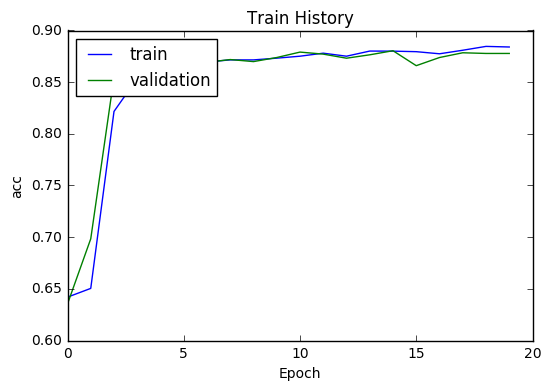

In [24]:
show_train_history(train_history,'acc','val_acc')

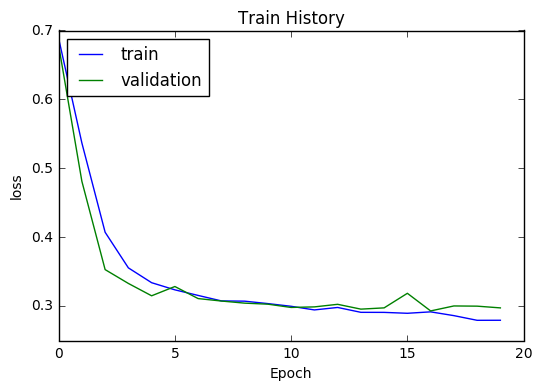

In [25]:
show_train_history(train_history,'loss','val_loss')

In [26]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 1s 144us/step


In [27]:
scores[1]

0.8709253416828553